In [4]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import numpy as np
import cv2
from math import sqrt, floor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from skimage import feature
import mahotas
import cv2
import os
import h5py
import glob
from tqdm import tqdm_notebook

In [5]:
def scale_and_apply_mask(image, mask, plot_example):
    original_image = cv2.resize(image, dsize=(800, 800))
    mask  = cv2.resize(mask, dsize=(800, 800))
    original_image[mask != 255] = 0
    if plot_example :
        _, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
        plt.sca(ax[0])
        plt.title("Original Image")
        plt.imshow(image)

        plt.sca(ax[1])
        plt.title("Mask (Scaled)")
        plt.imshow(mask)

        plt.sca(ax[2])
        plt.title("Fused (Scaled)")
        plt.imshow(original_image)

        plt.show()
    
    return original_image

0it [00:00, ?it/s]

0it [00:00, ?it/s]

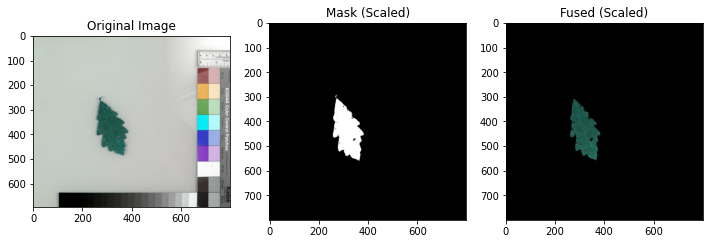

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [6]:
if not os.path.isdir("./clean_data"):
    os.mkdir("./clean_data")

for leaf_class_num, leaf_class in tqdm_notebook(enumerate(os.listdir('./dataset/images/lab'))):
    if not os.path.isdir(f"./clean_data/{leaf_class}"):
        os.mkdir(f"./clean_data/{leaf_class}")
    counter = 0
    for leaf_num , leaf_image_path in enumerate(glob.glob(f'./dataset/images/lab/{leaf_class}/*.jpg')):
        segmented_leaf_image_path = leaf_image_path.replace("images","segmented").replace("jpg", "png")
        leaf_image = cv2.imread(leaf_image_path)
        leaf_image_segmented = cv2.imread(segmented_leaf_image_path)
        if 255 in leaf_image_segmented:
            if leaf_class_num == 0 and leaf_num == 0:
                result = scale_and_apply_mask(leaf_image, leaf_image_segmented, True)
            else :
                result = scale_and_apply_mask(leaf_image, leaf_image_segmented, False)

            image_hsv = cv2.cvtColor(result, cv2.COLOR_BGR2HSV)

            mask_yellow_green = cv2.inRange(image_hsv, (10, 39, 30), (86, 255, 255))
            mask_brown = cv2.inRange(image_hsv, (8, 60, 10), (30, 255, 200))
            mask = cv2.bitwise_or(mask_yellow_green, mask_brown)
            result = cv2.bitwise_and(result, result, mask=mask)


            if  (result > 0).sum() > 24000:
                cv2.imwrite(f"./clean_data/{leaf_class}/{counter}.png", result)
                counter = counter +1
      

Lines 4 - 10 imports the necessary libraries we need to work with. Line 16 used to convert the input image to a fixed size of (500, 500). Line 17 is the path to our training dataset. Lines 18 - 19 stores our global features and labels in output directory. Line 20 is the number of bins for color histograms.

In [50]:
import operator

#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------


#--------------------
# tunable-parameters
#--------------------
images_per_class = {}
DIR = "./clean_data"
for name in os.listdir(DIR):
    if os.path.isdir(os.path.join(DIR, name)):
        count = 0
        for file in os.listdir(os.path.join(DIR, name)):
            if os.path.isfile(os.path.join(DIR, name, file)):
                count += 1
        images_per_class[name] = count

train_path                = "./clean_data"
h5_data                   = 'output/data.h5'
h5_color_hist_data        = 'output/color_hist_data.h5'
h5_data_hu_moments        = 'output/h5_data_hu_moments'
h5_data_haralick_features = 'output/h5_data_haralick_features'
h5_data_lbph_feature      = 'output/h5_data_lbph_feature'
h5_data_sift_feature      = 'output/h5_data_sift_feature'
h5_data_hog_feature       = 'output/h5_data_hog_feature'
h5_labels                 = 'output/labels.h5'
bins                      = 8

images_per_class = dict(sorted(images_per_class.items(), key=operator.itemgetter(1),reverse=True)[1:13])

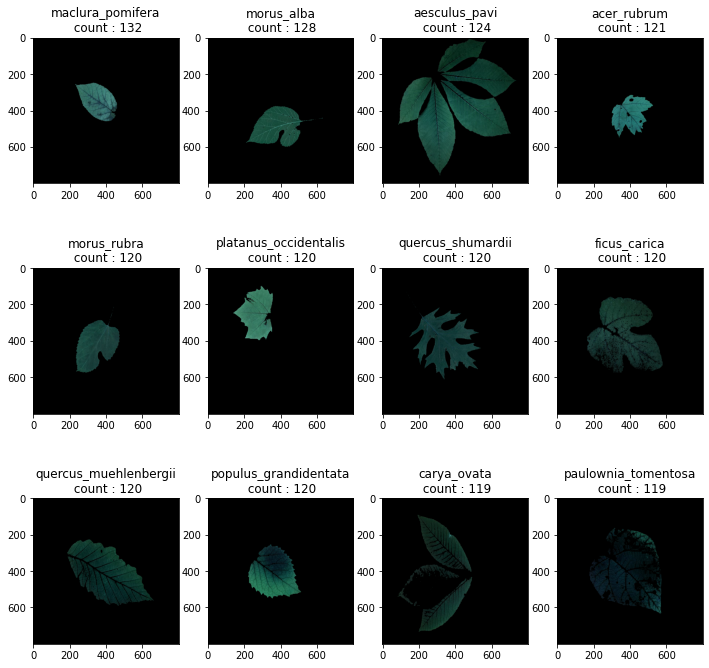

In [73]:
rows = 3
cols = 4
_, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,12))

counter = 0

for row in range(0,rows):
    for col in range(0,cols):
        leaf_class = list(images_per_class.keys())[counter]
        leaf_image = cv2.imread(f"./clean_data/{leaf_class}/0.png")
        ax[row, col].set_title(leaf_class + "\n count : " +str(images_per_class[leaf_class]))
        ax[row, col].imshow(leaf_image)
        counter = counter +1
        
plt.show()
    


Functions for global feature descriptors
1. Hu Moments
To extract Hu Moments features from the image, we use cv2.HuMoments() function provided by OpenCV. The argument to this function is the moments of the image cv2.moments() flatenned. It means we compute the moments of the image and convert it to a vector using flatten(). Before doing that, we convert our color image into a grayscale image as moments expect images to be grayscale.

In [74]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

Haralick Textures To extract Haralick Texture features from the image, we make use of mahotas library. The function we will be using is mahotas.features.haralick(). Before doing that, we convert our color image into a grayscale image as haralick feature descriptor expect images to be grayscale.

In [75]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

Color Histogram To extract Color Histogram features from the image, we use cv2.calcHist() function provided by OpenCV. The arguments it expects are the image, channels, mask, histSize (bins) and ranges for each channel [typically 0-256). We then normalize the histogram using normalize() function of OpenCV and return a flattened version of this normalized matrix using flatten().

In [76]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

**Important**: To get the list of training labels associated with each image, under our training path, we are supposed to have folders that are named with the labels of the respective flower species name inside which all the images belonging to that label are kept. Please keep a note of this as you might get errors if you don't have a proper folder structure.

In [77]:
# feature-descriptor-4: Local binary patterns histogram
def lbph_describe(image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image[:,:,0], 24, 8, method="uniform")
        (hist, _) = np.histogram(
            lbp.ravel(),
            bins=np.arange(0, 27),
            range=(0, 10),
        )
        # normalize the histogram
        hist = hist.astype("float")
        hist /= hist.sum() + eps
        # return the histogram of Local Binary Patterns
        return hist


In [204]:
from sklearn.cluster import KMeans
import pickle
from scipy.spatial.distance import cdist

def extract_sift_features(list_image):

    image_descriptors = []
    sift = cv2.xfeatures2d.SIFT_create()
    for image in list_image:
        _, descriptor = sift.detectAndCompute(image, None)
        image_descriptors.append(descriptor)

    return image_descriptors

def kmean_bow(all_descriptors, num_cluster):
    bow_dict = []

    kmeans = KMeans(n_clusters = num_cluster)
    kmeans.fit(all_descriptors)

    bow_dict = kmeans.cluster_centers_

    if not os.path.isfile('bow_dictionary.pkl'):
        pickle.dump(bow_dict, open('bow_dictionary.pkl', 'wb'))

    return bow_dict

def create_feature_bow(image_descriptors, BoW, num_cluster):

    X_features = []

    for i in range(len(image_descriptors)):
        features = np.array([0] * num_cluster)

        if image_descriptors[i] is not None:
            distance = cdist(image_descriptors[i], BoW)

            argmin = np.argmin(distance, axis = 1)

            for j in argmin:
                features[j] += 1
        X_features.append(features)

    return X_features

In [79]:

# feature-descriptor-6: HOG FEATURES

# importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

def fd_hog(img):

    #resize image
    resized_img = resize(img, (128,64))

    #generating HOG features
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), visualize=True, multichannel=True)

    return fd

In [108]:
# get the training labels
train_labels = list(images_per_class.keys())

# sort the training labels
train_labels.sort()
print(train_labels)

h5_data_all  = 'output/data_all.h5'

# empty lists to hold feature vectors and labels
global_features     = []
global_features_all = []
labels              = []
hu_moments_features = []
haralick_features   = []
color_hist_features = []
lbph_feature        = []
hog_feature         = []



['acer_rubrum', 'aesculus_pavi', 'carya_ovata', 'ficus_carica', 'maclura_pomifera', 'morus_alba', 'morus_rubra', 'paulownia_tomentosa', 'platanus_occidentalis', 'populus_grandidentata', 'quercus_muehlenbergii', 'quercus_shumardii']


For each of the training label name, we iterate through the corresponding folder to get all the images inside it. For each image that we iterate, we first resize the image into a fixed size. Then, we extract the three global features and concatenate these three features using NumPy’s np.hstack() function. We keep track of the feature with its label using those two lists we created above - labels and global_features. You could even use a dictionary here. Below is the code snippet to do these.

In [176]:
# loop over the training data sub-folders
for training_name in tqdm_notebook(train_labels):
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name
    
    # loop over the images in each sub-folder
    for x in tqdm_notebook(range(0,images_per_class[training_name]), leave=False):

        # get the image file name
        file = dir + "/" + str(x) + ".png"

        # read the image and resize it to a fixed-size
        image = cv2.imread(file)

        ####################################
        # SIFT FEATURE EXTRACTION
        ####################################

        ####################################
        # Hog FEATURE EXTRACTION
        ####################################
        fv_hog = fd_hog(image)

        ####################################
        # Global Feature extraction
        ####################################

        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)
        fv_lbph_describe = lbph_describe(image)

        ###################################
        # Concatenate global features
        ###################################
        global_feature_all = np.hstack([fv_histogram, fv_haralick, fv_hu_moments, fv_lbph_describe])
        
        global_feature = np.hstack([fv_histogram, fv_haralick])

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)
        global_features_all.append(global_feature_all)
        hu_moments_features.append(fv_hu_moments)
        haralick_features.append(fv_haralick)
        color_hist_features.append(fv_histogram)
        lbph_feature.append(fv_lbph_describe)
        hog_feature.append(fv_hog)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

[STATUS] processed folder: acer_rubrum


  0%|          | 0/124 [00:00<?, ?it/s]

[STATUS] processed folder: aesculus_pavi


  0%|          | 0/119 [00:00<?, ?it/s]

[STATUS] processed folder: carya_ovata


  0%|          | 0/120 [00:00<?, ?it/s]

[STATUS] processed folder: ficus_carica


  0%|          | 0/132 [00:00<?, ?it/s]

[STATUS] processed folder: maclura_pomifera


  0%|          | 0/128 [00:00<?, ?it/s]

[STATUS] processed folder: morus_alba


  0%|          | 0/120 [00:00<?, ?it/s]

[STATUS] processed folder: morus_rubra


  0%|          | 0/119 [00:00<?, ?it/s]

[STATUS] processed folder: paulownia_tomentosa


  0%|          | 0/120 [00:00<?, ?it/s]

[STATUS] processed folder: platanus_occidentalis


  0%|          | 0/120 [00:00<?, ?it/s]

[STATUS] processed folder: populus_grandidentata


  0%|          | 0/120 [00:00<?, ?it/s]

[STATUS] processed folder: quercus_muehlenbergii


  0%|          | 0/120 [00:00<?, ?it/s]

[STATUS] processed folder: quercus_shumardii
[STATUS] completed Global Feature Extraction...


###### After extracting features and concatenating it, we need to save this data locally. Before saving this data, we use something called LabelEncoder() to encode our labels in a proper format. This is to make sure that the labels are represented as unique numbers. As we have used different global features, one feature might dominate the other with respect to it’s value. In such scenarios, it is better to normalize everything within a range (say 0-1). Thus, we normalize the features using scikit-learn’s MinMaxScaler() function. After doing these two steps, we use h5py to save our features and labels locally in .h5 file format. Below is the code snippet to do these.

In [160]:
if not os.path.isdir('./output'):
    os.mkdir('./output')

# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))


# save the all  global feature vector using HDF5
rescaled_features_all = scaler.fit_transform(global_features_all)
h5f_data_all = h5py.File(h5_data_all, 'w')
h5f_data_all.create_dataset('dataset_1', data=np.array(rescaled_features_all))

# save the global feature vector using HDF5
rescaled_features = scaler.fit_transform(global_features)
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

# scale hu features in the range (0-1)
hu_rescaled_features = scaler.fit_transform(hu_moments_features)
h5f_data_hu_moments = h5py.File(h5_data_hu_moments, 'w')
h5f_data_hu_moments.create_dataset('dataset_1', data=np.array(hu_rescaled_features))

# scale haralick in the range (0-1)
haralick_rescaled_features = scaler.fit_transform(haralick_features)
h5f_data_haralick_features = h5py.File(h5_data_haralick_features, 'w')
h5f_data_haralick_features.create_dataset('dataset_1', data=np.array(haralick_rescaled_features))

# scale color histogram in the range (0-1)
color_hist_rescaled_features = scaler.fit_transform(color_hist_features)
h5f_color_hist_data = h5py.File(h5_color_hist_data, 'w')
h5f_color_hist_data.create_dataset('dataset_1', data=np.array(color_hist_rescaled_features))

# scale LBPH in the range (0-1)
lbph_rescaled_features = scaler.fit_transform(lbph_feature)
h5f_data_lbph_feature = h5py.File(h5_data_lbph_feature, 'w')
h5f_data_lbph_feature.create_dataset('dataset_1', data=np.array(lbph_rescaled_features))

# scale hog in the range (0-1)
hog_rescaled_features = scaler.fit_transform(hog_feature)
h5f_data_hog_feature= h5py.File(h5_data_hog_feature, 'w')
h5f_data_hog_feature.create_dataset('dataset_1', data=np.array(hog_rescaled_features))

#save label
h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data_lbph_feature.close()
h5f_data_haralick_features.close()
h5f_data_hu_moments.close()
h5f_color_hist_data.close()
h5f_data_sift_feature.close()
h5f_data_hog_feature.close()
h5f_data.close()
h5f_data_all.close()
h5f_label.close()

print("[STATUS] end of training..")

[STATUS] feature vector size (1463, 525)
[STATUS] training Labels (1463,)
[STATUS] training labels encoded...
[STATUS] end of training..


Notice that there are 532 columns in the global feature vector which tells us that when we concatenate color histogram, haralick texture and hu moments, we get a single row with 532 columns. So, for 1360 images, we get a feature vector of size (1360, 532). Also, you could see that the target labels are encoded as integer values in the range (0-16) denoting the 17 classes of flower species.

Notice that there are 532 columns in the global feature vector which tells us that when we concatenate color histogram, haralick texture and hu moments, we get a single row with 532 columns. So, for 1360 images, we get a feature vector of size (1360, 532). Also, you could see that the target labels are encoded as integer values in the range (0-16) denoting the 17 classes of flower species.

In [234]:
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from skimage import feature
import joblib

warnings.filterwarnings('ignore')

#--------------------
# tunable-parameters
#--------------------
num_trees = 100
test_size = 0.20
seed      = 9
train_path = "./clean_data"
h5_data    = 'output/data.h5'
h5_data_all    = 'output/data_all.h5'
h5_color_hist_data = 'output/color_hist_data.h5'
h5_data_hu_moments = 'output/h5_data_hu_moments'
h5_data_haralick_features = 'output/h5_data_haralick_features'
h5_data_lbph_feature = 'output/h5_data_lbph_feature'
h5_data_hog_feature = 'output/h5_data_hog_feature'
h5_labels  = 'output/labels.h5'
scoring    = "accuracy"

# # get the training labels
# train_labels = os.listdir(train_path)

# # sort the training labels
# train_labels.sort()

# if not os.path.exists(test_path):
#     os.makedirs(test_path)

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_data, 'r')
h5f_data_all  = h5py.File(h5_data_all, 'r')
h5f_label = h5py.File(h5_labels, 'r')
h5f_data_lbph_feature = h5py.File(h5_data_lbph_feature, 'r')
h5f_data_haralick_features = h5py.File(h5_data_haralick_features, 'r')
h5f_data_hu_moments = h5py.File(h5_data_hu_moments, 'r')
h5f_color_hist_data =h5py.File(h5_color_hist_data, 'r')
h5f_data_hog_feature = h5py.File(h5_data_hog_feature, 'r')


global_features_string = h5f_data['dataset_1']
global_features_string_all = h5f_data_all['dataset_1']
global_labels_string   = h5f_label['dataset_1']
lbph_feature_string = h5f_data_lbph_feature['dataset_1']
data_haralick_features_string = h5f_data_haralick_features['dataset_1']
data_hu_moments_string = h5f_data_hu_moments['dataset_1']
color_hist_data_string = h5f_color_hist_data['dataset_1']
hog_feature_string = h5f_data_hog_feature['dataset_1']



global_features_all = np.array(global_features_string_all)
global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)
lbph_feature = np.array(lbph_feature_string)
data_haralick_features = np.array(data_haralick_features_string)
data_hu_moments_features = np.array(data_hu_moments_string)
color_hist_data_features = np.array(color_hist_data_string)
hog_feature = np.array(hog_feature_string)



h5f_data_hog_feature.close()
h5f_data_lbph_feature.close()
h5f_data_haralick_features.close()
h5f_data_hu_moments.close()
h5f_color_hist_data.close()
h5f_data.close()
h5f_data_all.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] all features shape: {}".format(global_features_all.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))
print("[STATUS] lbph_feature shape: {}".format(lbph_feature.shape))
print("[STATUS] data_haralick_features shape: {}".format(data_haralick_features.shape))
print("[STATUS] data_hu_moments_features shape: {}".format(data_hu_moments_features.shape))
print("[STATUS] color_hist_data_features shape: {}".format(color_hist_data_features.shape))
print("[STATUS] hog_feature shape: {}".format(hog_feature.shape))


print("[STATUS] training started...")

[STATUS] features shape: (1463, 525)
[STATUS] all features shape: (1463, 558)
[STATUS] labels shape: (1463,)
[STATUS] lbph_feature shape: (1463, 26)
[STATUS] data_haralick_features shape: (1463, 13)
[STATUS] data_hu_moments_features shape: (1463, 7)
[STATUS] color_hist_data_features shape: (1463, 512)
[STATUS] hog_feature shape: (1463, 3780)
[STATUS] training started...


In [163]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)


(trainDataGlobal_all, testDataGlobal_all, trainLabelsGlobal_all, testLabelsGlobal_all) = train_test_split(np.array(global_features_all),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)


(trainDatalbph, testDatalbph, trainLabelslbph, testLabelslbph) = train_test_split(np.array(lbph_feature),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

(trainDataharalick, testDataharalick, trainLabelsharalick, testLabelsharalick) = train_test_split(np.array(data_haralick_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

(trainDatahu_moments, testDatahu_moments, trainLabelshu_moments, testLabelshu_moments) = train_test_split(np.array(data_hu_moments_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

(trainDatacolor_hist, testDatacolor_hist, trainLabelscolor_hist, testLabelscolor_hist) = train_test_split(np.array(color_hist_data_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)


(trainDatahog, testDatahog, trainLabelshog, testLabelshog) = train_test_split(np.array(hog_feature),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)


print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))


print("[STATUS] splitted train and test data...")
print("Train data all : {}".format(trainDataGlobal_all.shape))
print("Test data  all : {}".format(testDataGlobal_all.shape))
print("Train labels all : {}".format(trainLabelsGlobal_all.shape))
print("Test labels all : {}".format(testLabelsGlobal_all.shape))




print("[STATUS] splitted train and test data...")
print("Train data lbph : {}".format(trainDatalbph.shape))
print("Test data  lbph : {}".format(testDatalbph.shape))
print("Train labels lbph: {}".format(trainLabelslbph.shape))
print("Test labels lbph: {}".format(testLabelslbph.shape))



print("[STATUS] splitted train and test data...")
print("Train data haralick : {}".format(trainDataharalick.shape))
print("Test data haralick  : {}".format(testDataharalick.shape))
print("Train labels haralick: {}".format(trainLabelsharalick.shape))
print("Test labels haralick : {}".format(testLabelsharalick.shape))


print("[STATUS] splitted train and test data...")
print("Train data hu moments : {}".format(trainDatahu_moments.shape))
print("Test data  hu moments : {}".format(testDatahu_moments.shape))
print("Train labels hu moments : {}".format(trainLabelshu_moments.shape))
print("Test labels hu moments : {}".format(testLabelshu_moments.shape))


print("[STATUS] splitted train and test data...")
print("Train data color_hist : {}".format(trainDatacolor_hist.shape))
print("Test data color_hist  : {}".format(testDatacolor_hist.shape))
print("Train labels color_hist : {}".format(trainLabelscolor_hist.shape))
print("Test labels color_hist : {}".format(testLabelscolor_hist.shape))


print("[STATUS] splitted train and test data...")
print("Train data hog : {}".format(trainDatahog.shape))
print("Test data  hog : {}".format(testDatahog.shape))
print("Train labels hog: {}".format(trainLabelshog.shape))
print("Test labels hog: {}".format(testLabelshog.shape))





[STATUS] splitted train and test data...
Train data  : (1170, 525)
Test data   : (293, 525)
Train labels: (1170,)
Test labels : (293,)
[STATUS] splitted train and test data...
Train data all : (1170, 558)
Test data  all : (293, 558)
Train labels all : (1170,)
Test labels all : (293,)
[STATUS] splitted train and test data...
Train data lbph : (1170, 26)
Test data  lbph : (293, 26)
Train labels lbph: (1170,)
Test labels lbph: (293,)
[STATUS] splitted train and test data...
Train data haralick : (1170, 13)
Test data haralick  : (293, 13)
Train labels haralick: (1170,)
Test labels haralick : (293,)
[STATUS] splitted train and test data...
Train data hu moments : (1170, 7)
Test data  hu moments : (293, 7)
Train labels hu moments : (1170,)
Test labels hu moments : (293,)
[STATUS] splitted train and test data...
Train data color_hist : (1170, 512)
Test data color_hist  : (293, 512)
Train labels color_hist : (1170,)
Test labels color_hist : (293,)
[STATUS] splitted train and test data...
Train

In [292]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

model_svm = SVC()

kernel = ["linear", "rbf", "sigmoid", "poly"]
tolerance = [1e-3, 1e-4, 1e-5, 1e-6]
C = [1, 1.5, 2, 2.5, 3]
grid = dict(kernel=kernel, tol=tolerance, C=C)

# kernel = ["rbf", "sigmoid"]
# tolerance = [1e-3, 1e-5, 1e-6]
# C = [1, 2.5, 5]
# grid = dict(kernel=kernel, tol=tolerance, C=C)

cvFold = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
gridSearch = GridSearchCV(estimator=model_svm, param_grid=grid, n_jobs=-1,
	cv=cvFold, scoring="neg_mean_squared_error")

  0%|          | 0/7 [00:00<?, ?it/s]

LR: 0.643590 (0.039916)
LDA: 0.676068 (0.031624)
KNN: 0.753846 (0.034991)
CART: 0.717094 (0.029223)
RF: 0.880342 (0.031980)
NB: 0.601709 (0.033366)
SVM: 0.601709 (0.047465)


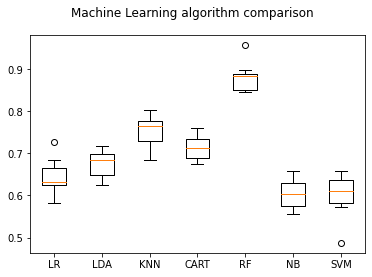

In [164]:
# 10-fold cross validation
for name, model in tqdm_notebook(models):
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [299]:
searchResults = gridSearch.fit(trainDataGlobal, trainLabelsGlobal)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(trainDataGlobal, trainLabelsGlobal))
print("SVM : score on testing set params: ", bestModel.score(testDataGlobal, testLabelsGlobal))
global_feature_svm = bestModel.score(testDataGlobal, testLabelsGlobal)

SVM : score on training set params:  0.7726495726495727
SVM : score on testing set params:  0.7030716723549488


In [329]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(trainDataGlobal, trainLabelsGlobal)
print("Random Forest : score on training set params: ", clf.score(trainDataGlobal, trainLabelsGlobal))
print("Random Forest : score on testing set params: ", clf.score(testDataGlobal, testLabelsGlobal))
global_feature_rf = clf.score(testDataGlobal, testLabelsGlobal)

Random Forest : score on training set params:  1.0
Random Forest : score on testing set params:  0.7918088737201365


  0%|          | 0/7 [00:00<?, ?it/s]

LR: 0.729060 (0.036473)
LDA: 0.800000 (0.028140)
KNN: 0.788889 (0.033333)
CART: 0.716239 (0.031934)
RF: 0.911111 (0.037490)
NB: 0.647009 (0.035457)
SVM: 0.623932 (0.048349)


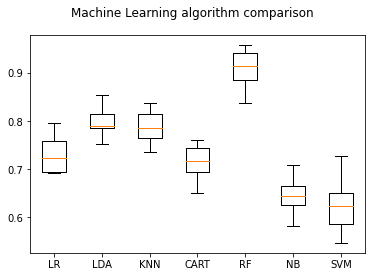

In [210]:
# variables to hold the results and names
results = []
names   = []

# 10-fold cross validation
for name, model in tqdm_notebook(models):
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, trainDataGlobal_all, trainLabelsGlobal_all, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [275]:
searchResults = gridSearch.fit(trainDataGlobal_all, trainLabelsGlobal_all)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(trainDataGlobal_all, trainLabelsGlobal_all))
print("SVM : score on testing set params: ", bestModel.score(testDataGlobal_all, testLabelsGlobal_all))
global_all_feature_svm = bestModel.score(testDataGlobal_all, testLabelsGlobal_all)

SVM : score on training set params:  0.8777777777777778
SVM : score on testing set params:  0.8156996587030717


In [301]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(trainDataGlobal_all, trainLabelsGlobal_all)
print("Random Forest : score on training set params: ", clf.score(trainDataGlobal_all, trainLabelsGlobal_all))
print("Random Forest : score on testing set params: ", clf.score(testDataGlobal_all, testLabelsGlobal_all))
global_all_feature_rf = clf.score(testDataGlobal_all, testLabelsGlobal_all)

Random Forest : score on training set params:  0.9991452991452991
Random Forest : score on testing set params:  0.8464163822525598


  0%|          | 0/7 [00:00<?, ?it/s]

LR: 0.723077 (0.038452)
LDA: 0.543590 (0.048228)
KNN: 0.658974 (0.045621)
CART: 0.443590 (0.048568)
RF: 0.696581 (0.033377)
NB: 0.412821 (0.032445)
SVM: 0.721368 (0.025412)


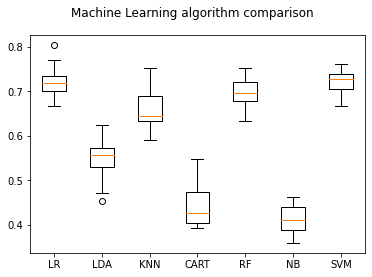

In [165]:
# variables to hold the results and names
results = []
names   = []

# 10-fold cross validation for Local feature : HOG
for name, model in tqdm_notebook(models):
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, trainDatahog, trainLabelshog, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [279]:
searchResults = gridSearch.fit(trainDatahog, trainLabelshog)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(trainDatahog, trainLabelshog))
print("SVM : score on testing set params: ", bestModel.score(testDatahog, testLabelshog))
hog_feature_svm = bestModel.score(testDatahog, testLabelshog)

SVM : score on training set params:  0.9863247863247864
SVM : score on testing set params:  0.7918088737201365


In [303]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(trainDatahog, trainLabelshog)
print("Random Forest : score on training set params: ", clf.score(trainDatahog, trainLabelshog))
print("Random Forest : score on testing set params: ", clf.score(testDatahog, testLabelshog))
hog_feature_rf = clf.score(testDatahog, testLabelshog)

Random Forest : score on training set params:  0.9991452991452991
Random Forest : score on testing set params:  0.6040955631399317


In [212]:
import glob
all_images = []
for leaf_class in list(images_per_class.keys()):
    for leaf_path in glob.glob('./clean_data/'+leaf_class+"/*"):
        all_images.append(cv2.imread(leaf_path))
image_desctiptors = extract_sift_features(all_images)

[ WARN:0@13134.994] global /Users/runner/work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [214]:
all_descriptors = []
for descriptor in image_desctiptors:
    if descriptor is not None:
        for des in descriptor:
            all_descriptors.append(des)

num_cluster = 60
BoW = kmean_bow(all_descriptors, num_cluster)

X_features = create_feature_bow(image_desctiptors, BoW, num_cluster)

In [243]:
X_train_sift, X_test_sift, Y_train_sift, Y_test_sift = train_test_split(X_features, global_labels, test_size = 0.2, random_state = 1)

  0%|          | 0/7 [00:00<?, ?it/s]

LR: 0.682906 (0.057899)
LDA: 0.675214 (0.028858)
KNN: 0.684615 (0.046728)
CART: 0.522222 (0.055713)
RF: 0.763248 (0.041354)
NB: 0.462393 (0.035540)
SVM: 0.699145 (0.037216)


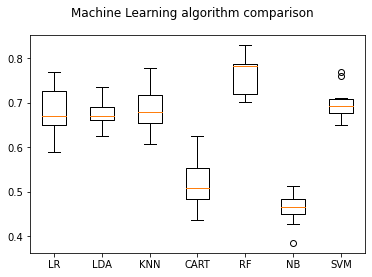

In [249]:
# variables to hold the results and names
results = []
names   = []

# 10-fold cross validation for Local feature : Sift
for name, model in tqdm_notebook(models):
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, X_train_sift, Y_train_sift, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [293]:
searchResults = gridSearch.fit(X_train_sift, Y_train_sift)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(X_train_sift, Y_train_sift))
print("SVM : score on testing set params: ", bestModel.score(X_test_sift, Y_test_sift))
sift_feature_svm = bestModel.score(X_test_sift, Y_test_sift)

SVM : score on training set params:  0.8418803418803419
SVM : score on testing set params:  0.7747440273037542


In [305]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(X_train_sift, Y_train_sift)
print("Random Forest : score on training set params: ", clf.score(X_train_sift, Y_train_sift))
print("Random Forest : score on testing set params: ", clf.score(X_test_sift, Y_test_sift))
sift_feature_rf = clf.score(X_test_sift, Y_test_sift)

Random Forest : score on training set params:  0.9923076923076923
Random Forest : score on testing set params:  0.658703071672355


  0%|          | 0/7 [00:00<?, ?it/s]

LR: 0.510256 (0.028617)
LDA: 0.614530 (0.032083)
KNN: 0.648718 (0.032083)
CART: 0.517949 (0.043615)
RF: 0.678632 (0.035282)
NB: 0.387179 (0.041354)
SVM: 0.574359 (0.024114)


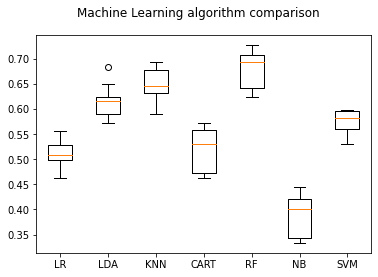

In [167]:
# variables to hold the results and names
results = []
names   = []

# 10-fold cross validation for Texture : lbph
for name, model in tqdm_notebook(models):
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, trainDatalbph, trainLabelslbph, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [294]:
searchResults = gridSearch.fit(trainDatalbph, trainLabelslbph)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(trainDatalbph, trainLabelslbph))
print("SVM : score on testing set params: ", bestModel.score(testDatalbph, testLabelslbph))
lbph_feature_svm = bestModel.score(testDatalbph, testLabelslbph)

SVM : score on training set params:  0.7606837606837606
SVM : score on testing set params:  0.6860068259385665


In [307]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(trainDatalbph, trainLabelslbph)
print("Random Forest : score on training set params: ", clf.score(trainDatalbph, trainLabelslbph))
print("Random Forest : score on testing set params: ", clf.score(testDatalbph, testLabelslbph))
lbph_feature_rf = clf.score(testDatalbph, testLabelslbph)

Random Forest : score on training set params:  0.9982905982905983
Random Forest : score on testing set params:  0.6416382252559727


  0%|          | 0/7 [00:00<?, ?it/s]

LR: 0.385470 (0.063553)
LDA: 0.492308 (0.038830)
KNN: 0.566667 (0.045876)
CART: 0.558120 (0.069652)
RF: 0.656410 (0.033931)
NB: 0.374359 (0.040954)
SVM: 0.428205 (0.029223)


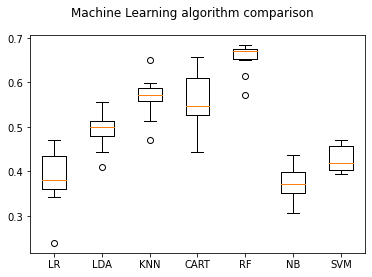

In [168]:
# variables to hold the results and names
results = []
names   = []

# 10-fold cross validation for Texture : haralick
for name, model in tqdm_notebook(models):
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, trainDataharalick, trainLabelsharalick, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [312]:
searchResults = gridSearch.fit(trainDataharalick, trainLabelsharalick)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(trainDataharalick, trainLabelsharalick))
print("SVM : score on testing set params: ", bestModel.score(testDataharalick, testLabelsharalick))
haralick_feature_svm = bestModel.score(testDataharalick, testLabelsharalick)

SVM : score on training set params:  0.594017094017094
SVM : score on testing set params:  0.5460750853242321


In [313]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(trainDataharalick, trainLabelsharalick)
print("Random Forest : score on training set params: ", clf.score(trainDataharalick, trainLabelsharalick))
print("Random Forest : score on testing set params: ", clf.score(testDataharalick, testLabelsharalick))
haralick_feature_rf = clf.score(testDataharalick, testLabelsharalick)

Random Forest : score on training set params:  0.9982905982905983
Random Forest : score on testing set params:  0.6484641638225256


  0%|          | 0/7 [00:00<?, ?it/s]

LR: 0.573504 (0.021774)
LDA: 0.575214 (0.030109)
KNN: 0.679487 (0.031112)
CART: 0.697436 (0.045097)
RF: 0.883761 (0.031100)
NB: 0.568376 (0.039585)
SVM: 0.594872 (0.035897)


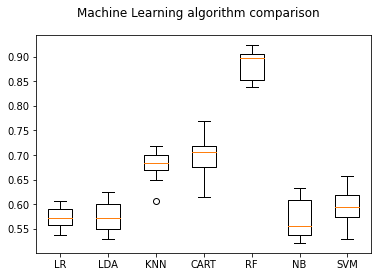

In [169]:
# variables to hold the results and names
results = []
names   = []

# 10-fold cross validation for Texture : color histogram
for name, model in tqdm_notebook(models):
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, trainDatacolor_hist, trainLabelscolor_hist, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [295]:
searchResults = gridSearch.fit(trainDatacolor_hist, trainLabelscolor_hist)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(trainDatacolor_hist, trainLabelscolor_hist))
print("SVM : score on testing set params: ", bestModel.score(testDatacolor_hist, testLabelscolor_hist))
color_hist_feature_svm = bestModel.score(testDatacolor_hist, testLabelscolor_hist)

SVM : score on training set params:  0.7042735042735043
SVM : score on testing set params:  0.6348122866894198


In [309]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(trainDatacolor_hist, trainLabelscolor_hist)
print("Random Forest : score on training set params: ", clf.score(trainDatacolor_hist, trainLabelscolor_hist))
print("Random Forest : score on testing set params: ", clf.score(testDatacolor_hist, testLabelscolor_hist))
color_hist_feature_rf = clf.score(testDatacolor_hist, testLabelscolor_hist)

Random Forest : score on training set params:  0.9991452991452991
Random Forest : score on testing set params:  0.78839590443686


  0%|          | 0/7 [00:00<?, ?it/s]

LR: 0.111966 (0.032535)
LDA: 0.184615 (0.034231)
KNN: 0.217094 (0.022024)
CART: 0.356410 (0.034623)
RF: 0.430769 (0.054218)
NB: 0.199145 (0.040820)
SVM: 0.092308 (0.026702)


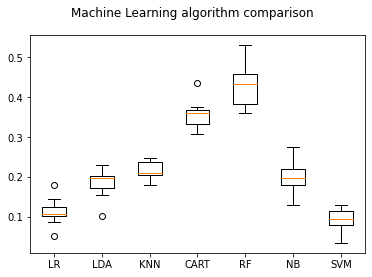

In [170]:
# variables to hold the results and names
results = []
names   = []

# 10-fold cross validation for Texture : hu moments
for name, model in tqdm_notebook(models):
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, trainDatahu_moments,  trainLabelshu_moments, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [310]:
searchResults = gridSearch.fit(trainDatahu_moments, trainLabelshu_moments)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(trainDatahu_moments, trainLabelshu_moments))
print("SVM : score on testing set params: ", bestModel.score(testDatahu_moments, testLabelshu_moments))
hu_feature_svm = bestModel.score(testDatahu_moments, testLabelshu_moments)

SVM : score on training set params:  0.09914529914529914
SVM : score on testing set params:  0.08191126279863481


In [311]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(trainDatahu_moments, trainLabelshu_moments)
print("Random Forest : score on training set params: ", clf.score(trainDatahu_moments, trainLabelshu_moments))
print("Random Forest : score on testing set params: ", clf.score(testDatahu_moments, testLabelshu_moments))
hu_feature_rf = clf.score(testDatahu_moments, testLabelshu_moments)

Random Forest : score on training set params:  0.9606837606837607
Random Forest : score on testing set params:  0.4334470989761092


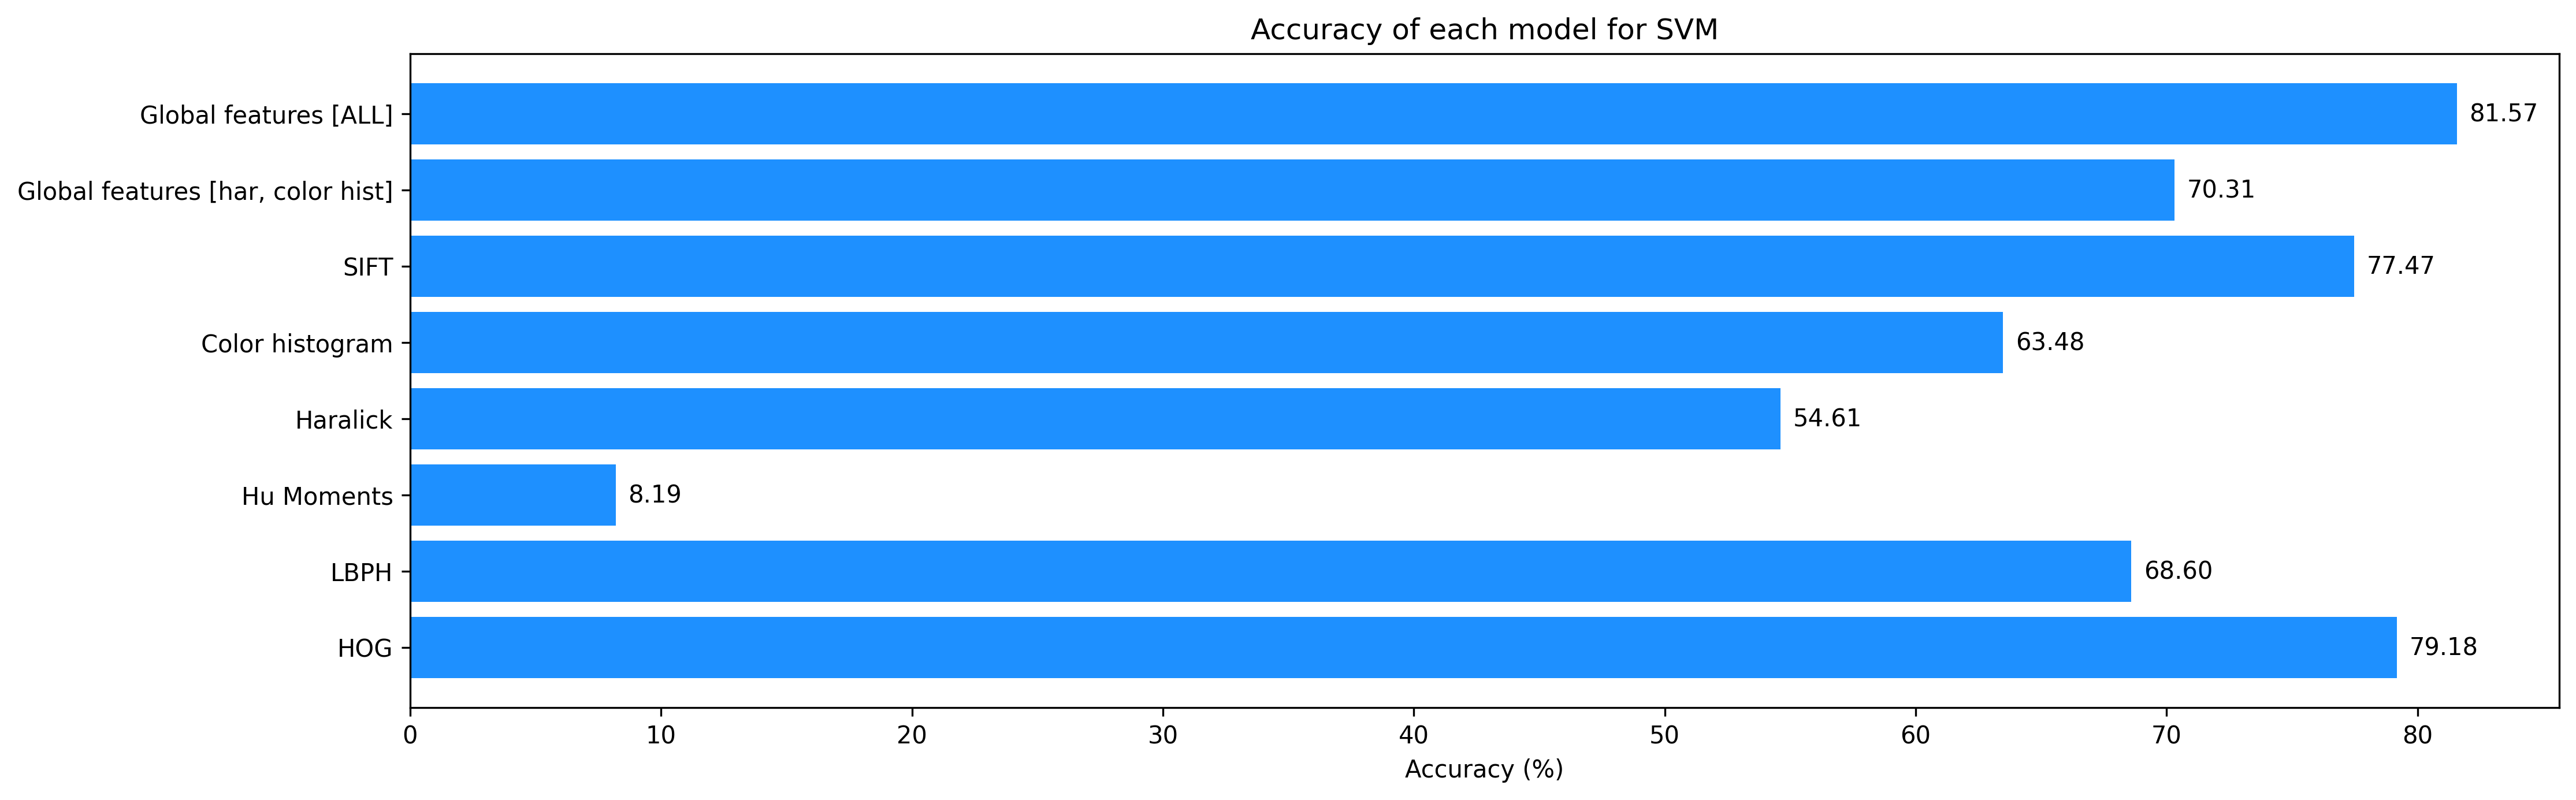

In [333]:
rows = ["HOG", "LBPH", "Hu Moments", "Haralick", "Color histogram", "SIFT", "Global features [har, color hist]", "Global features [ALL]"]
accuracies = [hog_feature_svm, lbph_feature_svm, hu_feature_svm, haralick_feature_svm, color_hist_feature_svm, sift_feature_svm, global_feature_svm, global_all_feature_svm]
accuracies = [accuracy * 100 for accuracy in accuracies]
fig, ax = plt.subplots(figsize=(16,5), dpi= 300)
plt.barh(rows, accuracies, color='dodgerblue')
plt.xlabel("Accuracy (%)")
plt.title("Accuracy of each model for SVM")

plt.yticks(rows)
for model,accuracy in enumerate(accuracies):
    ax.annotate(str("{:.2f}".format(accuracy)),xy=(accuracy+0.5,model-0.1))

plt.savefig("svm_results.png")
plt.show()

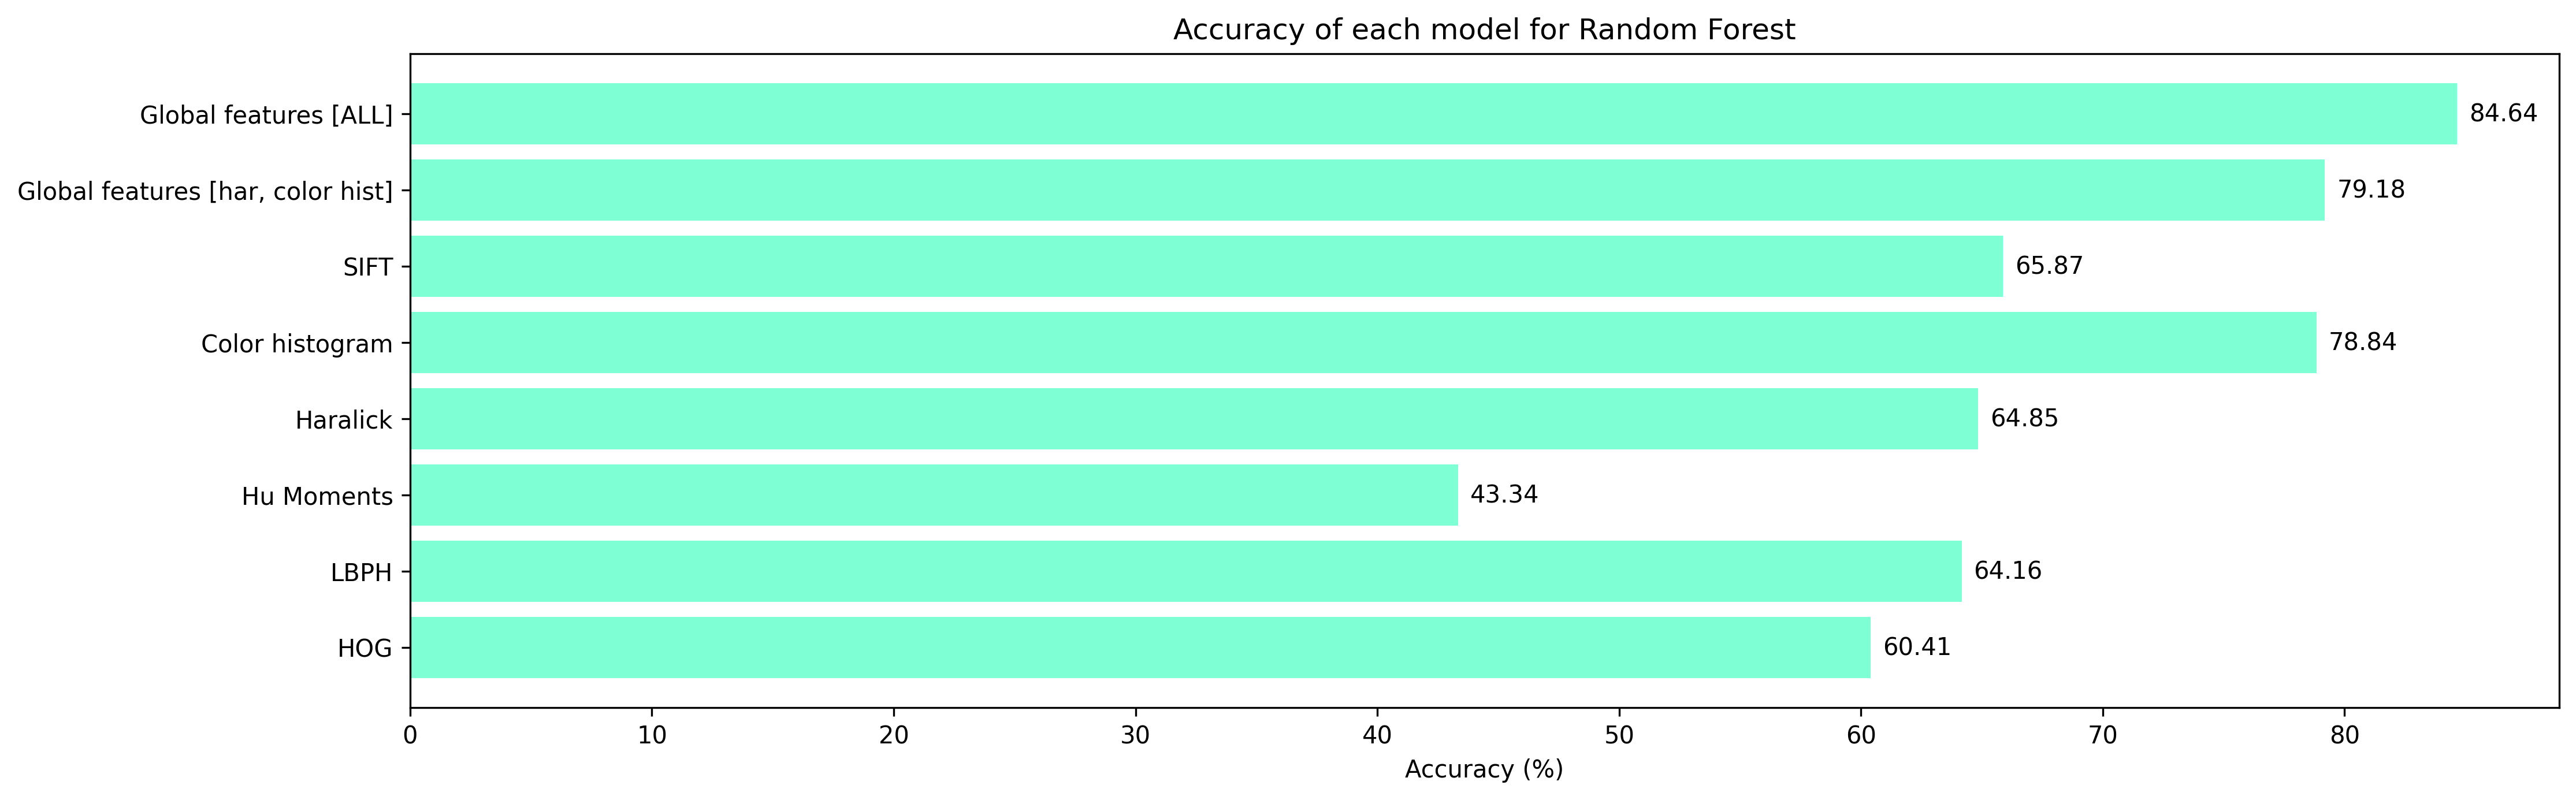

In [335]:
rows = ["HOG", "LBPH", "Hu Moments", "Haralick", "Color histogram", "SIFT", "Global features [har, color hist]", "Global features [ALL]"]
accuracies = [hog_feature_rf, lbph_feature_rf, hu_feature_rf, haralick_feature_rf, color_hist_feature_rf, sift_feature_rf, global_feature_rf, global_all_feature_rf]
accuracies = [accuracy * 100 for accuracy in accuracies]
fig, ax = plt.subplots(figsize=(16,5), dpi= 300)
plt.barh(rows, accuracies, color='aquamarine')
plt.xlabel("Accuracy (%)")
plt.title("Accuracy of each model for Random Forest")

plt.yticks(rows)
for model,accuracy in enumerate(accuracies):
    ax.annotate(str("{:.2f}".format(accuracy)),xy=(accuracy+0.5,model-0.1))

plt.savefig("rf_results.png")
plt.show()


In [371]:
clf = RandomForestClassifier(n_estimators=15, random_state=seed, max_depth = 20)
clf.fit(trainDataGlobal_all, trainLabelsGlobal_all)
print("Random Forest : score on training set params: ", clf.score(trainDataGlobal_all, trainLabelsGlobal_all))
print("Random Forest : score on testing set params: ", clf.score(testDataGlobal_all, testLabelsGlobal_all))
global_all_feature_rf = clf.score(testDataGlobal_all, testLabelsGlobal_all)

Random Forest : score on training set params:  0.9991452991452991
Random Forest : score on testing set params:  0.8464163822525598


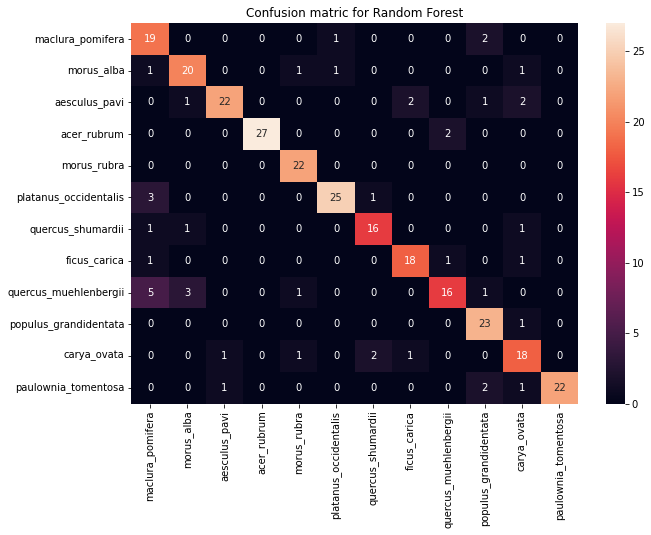

In [379]:
from sklearn import metrics

import seaborn as sn
import pandas as pd

predicted = clf.predict(testDataGlobal_all)
conf_matrix = metrics.confusion_matrix(testLabelsGlobal_all, predicted)

labels = list(images_per_class.keys())

df_cm = pd.DataFrame(conf_matrix, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.title("Confusion matric for Random Forest")
plt.savefig("confusion_matrix_rf.png", dpi = 600)

In [377]:
searchResults = gridSearch.fit(trainDataGlobal_all, trainLabelsGlobal_all)
# extract the best model and evaluate it
bestModel = searchResults.best_estimator_
print("SVM : score on training set params: ", bestModel.score(trainDataGlobal_all, trainLabelsGlobal_all))
print("SVM : score on testing set params: ", bestModel.score(testDataGlobal_all, testLabelsGlobal_all))
global_all_feature_svm = bestModel.score(testDataGlobal_all, testLabelsGlobal_all)

SVM : score on training set params:  0.8777777777777778
SVM : score on testing set params:  0.8156996587030717


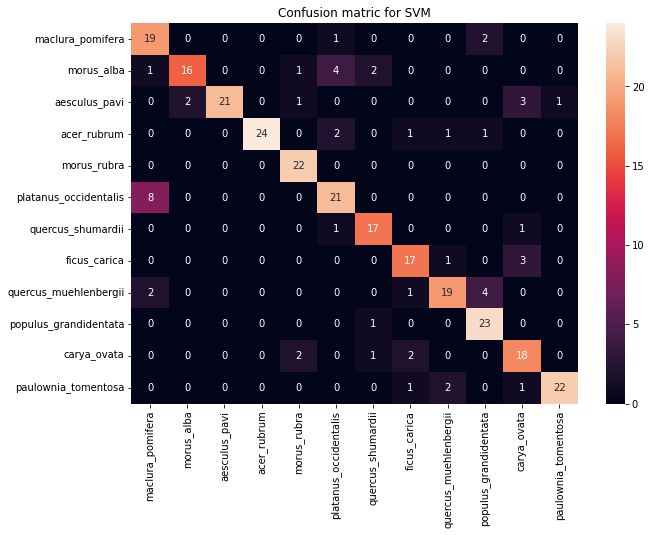

In [380]:
predicted = bestModel.predict(testDataGlobal_all)
conf_matrix = metrics.confusion_matrix(testLabelsGlobal_all, predicted)

labels = list(images_per_class.keys())

df_cm = pd.DataFrame(conf_matrix, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.title("Confusion matric for SVM")
plt.savefig("confusion_matrix_SVM.png", dpi = 600)

In [370]:
#-----------------------------------
# TESTING OUR SIFT MODEL
#-----------------------------------

# to visualize results
import matplotlib.pyplot as plt

# create the model - Random Forests
clf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)

# fit the training data to the model
clf.fit(trainDatasift, trainLabelssift)

RandomForestClassifier(random_state=9)

In [ ]:
# loop through the test images
for file in glob.glob("/content/content/dataset/input/acer_ginnala/*.png"):
    # read the image
    image = cv2.imread(file)

    # resize the image
    image = cv2.resize(image, (800,800))

 
    # SIFT FEATURE EXTRACTION
    ####################################
    fv_sift = fd_sift(image)
    

    # scale features in the range (0-1)
    # scaler = MinMaxScaler(feature_range=(0, 1))
    # lbph_rescaled_feature = scaler.fit_transform(fv_lbp_describe.reshape(-1,1))

    # predict label of test image
    prediction = clf.predict(fv_sift.reshape(1,-1))[0]

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    break